***IMPORTING LIBRARIES***

In [1]:
import numpy as np
from numpy.random import choice
import math
import random
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
%matplotlib inline

***TASK***

Let's consider a scenario where there are two types of coins in the population : one is unbiased and another is biased whose probability of giving heads on a toss is 0.75 (each coin toss is independent)

Our task is to watch the tossing of 100 people (where they'll just toss a coin multiple number of times) and make inferences about whether they are using a biased coin or not with minimal false accusations and maximum accuracy.

***ANALYSIS***

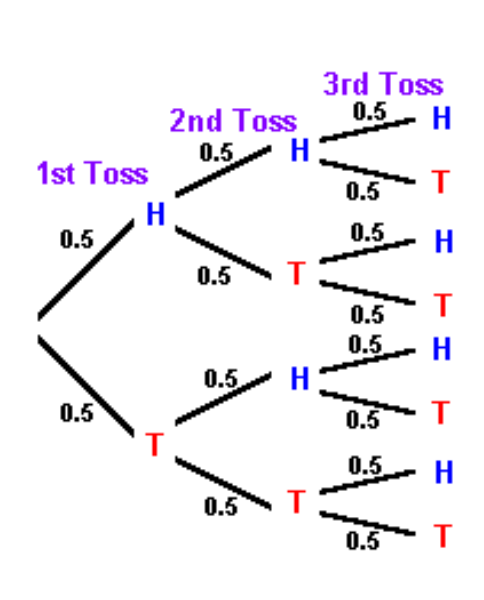

Our initial guess would be to take the person with most amount of heads in n tosses and call it a biased coin user

eg: if n=3;

- P(X=3|fair) = (1/2)^3 = 0.125 i.e. 12.5%
- P(X=3|unfair) = (3/4)^3 = 0.422 i.e. 42.2%

Thus by Bayes's Theorem: probability of coin being unfair if X=3 equals 0.77

But let's take another assumption that we don't want to falsely accuse a person of using an unbiased coin at least 90% of the time - (Criteria-1)

Thus taking n=4;

- P(X=4|fair) = (1/2)^4 = 0.0625 i.e. 6.25%
- P(X=4|unfair) = (3/4)^4 = 0.316 i.e. 31.6%


In [2]:
'''a testing function with takes in sample size , no. of coin flips, 
and no. of heads above or equal which we accuse '''
def testing(sample,n,n_limit):
    actual=[]
    predicted=[]
    options = ['fair','unfair']
    toss=['heads','tails']
    for i in range(sample):
        heads_count=0
        pick=choice(options,1, p=[0.5,0.5])
        actual.append(pick=='fair')
        if pick=='fair':
            tosses=choice(toss,n,p=[0.5,0.5])
        else:
            tosses=choice(toss,n,p=[0.75,0.25])
        for cnt in tosses:
            if cnt=='heads':
                heads_count=heads_count+1
        if(heads_count>=n_limit):
            predicted.append(0)
        else:
            predicted.append(1)
    
    cf_matrix = confusion_matrix(actual,predicted)
    print(f"Accuracy of model : {accuracy_score(actual,predicted)*100}%")
    plt. figure(figsize=(8, 6))
    sns.heatmap(cf_matrix, annot=True,xticklabels=['Unfair Coin','Fair Coin'],
            yticklabels=['Unfair Coin','Fair Coin'])      
    plt.xlabel( 'Predicted')
    plt. ylabel( 'Actual')
    plt.title( 'Confusion Matrix')
    plt. show()    
    print(f"Type 1 error rate OR % of unbiased user falsely accused : {cf_matrix[1][0]/(cf_matrix[1][0]+cf_matrix[1][1])*100:0.2f}%")
    print(f"Type 2 error rate OR % of biased user not accused : {cf_matrix[0][1]/(cf_matrix[0][0]+cf_matrix[0][1])*100:0.2f}%")

Accuracy of model : 63.0%


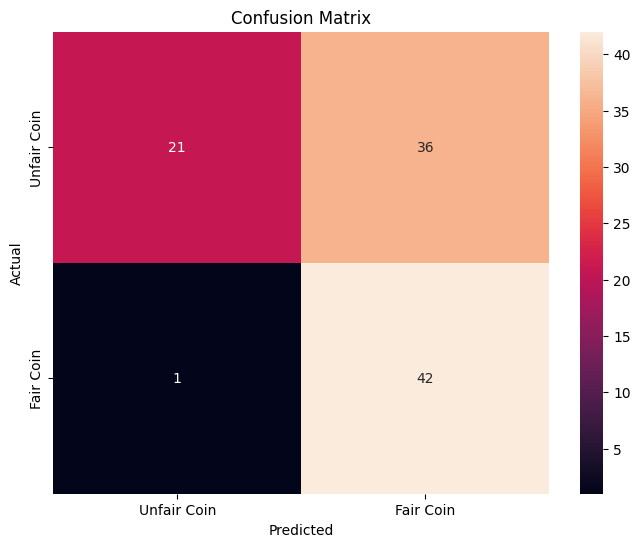

Type 1 error rate OR % of unbiased user falsely accused : 2.33%
Type 2 error rate OR % of biased user not accused : 63.16%


In [3]:
testing(100,4,4)# based on our previous discussion

It appears we've successfully met our criteria-1 but we failed to catch 
many biased coin users so we have to reduce this type-2 error or % of user not accused to, lets say, less than 20% (criteria-2) since there
is a trade-off between type-1 and type-2 error, therefore it'll be somewhat difficult
to precisely say the amount . 

Lets recall our parameters we have control of:

- coin tosses per person
- no. of heads equals or above which we accuse

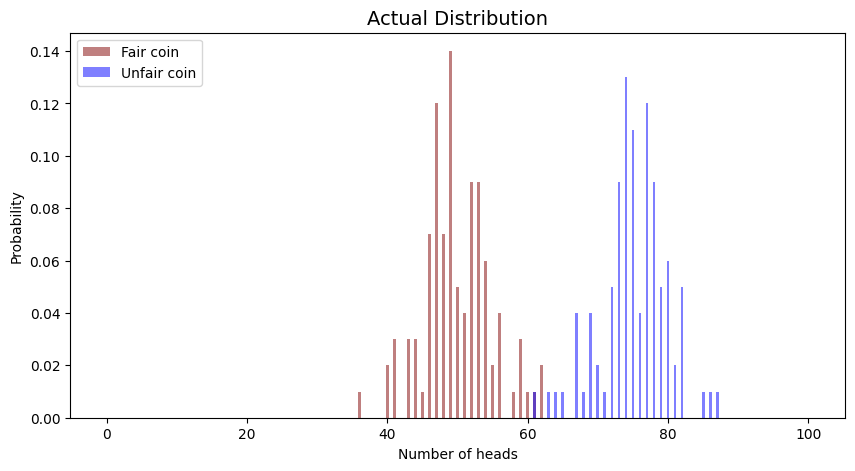

In [4]:
#first let's consider probability distribution for a fair dice
toss = ['heads','tails']
all_counts_fair=[]
all_counts_unfair=[]
sample_size=100 #increase it for checking out if it follows bionomial for real or not
for i in range (sample_size):
    throws=100 #can play with this 
    count_fair=0
    count_unfair=0
    fair_tosses = choice(toss,throws, p=[0.5,0.5])
    unfair_tosses = choice(toss,throws, p=[0.75,0.25])
    for f_toss,unf_toss in zip(fair_tosses,unfair_tosses):
        if f_toss=='heads':
            count_fair=count_fair+1
        if unf_toss=='heads':
            count_unfair=count_unfair+1
    all_counts_fair.append(count_fair)
    all_counts_unfair.append(count_unfair)
    
res_fair = {key: all_counts_fair.count(key)/len(all_counts_fair) for key in range(101)}
res_unfair = {key: all_counts_unfair.count(key)/len(all_counts_unfair) for key in range(101)}

fig = plt.figure(figsize=(10, 5))

# Creating the bar plot
plt.bar(res_fair.keys(), res_fair.values(), color='maroon', width=0.4, label='Fair coin',alpha=0.5)
plt.bar(res_unfair.keys(), res_unfair.values(), color='blue', width=0.4, label='Unfair coin',alpha=0.5)

plt.legend(loc='upper left')  

plt.title('Actual Distribution', fontsize=14)

plt.xlabel('Number of heads')
plt.ylabel('Probability')

plt.show()

Thus we can easily see even if we did not know beforehand that it'll follow bionomial distribution and hence could also be approximated by using bionomial distribution

In [5]:
def plot_graph(bio_fair,bio_unfair):
    fig = plt.figure(figsize = (10, 5))

    #     creating the bar plot
    
    plt.bar(bio_fair.keys(), bio_fair.values(), color ='maroon', 
            width = 0.4,label='Fair Coin',alpha=0.5)
    plt.bar(bio_unfair.keys(), bio_unfair.values(), color ='blue',width = 0.4,label='Unfair Coin',alpha=0.5)
    plt.legend(loc='upper left')
    plt.xlabel( 'Number of heads')
    plt.ylabel( 'Probability')
    plt.title( 'Bionomial Distribution',fontsize=14)

In [6]:
#Binomial Distribution
#nCr*(p^r)*(q^(n-r)) where p+q=1
def bionomial(throws=100):
    bio_fair={}
    bio_unfair={}
    expected_fair=0
    expected_unfair=0
    for toss in range(throws+1):
        bio_fair[toss]=(math.comb(throws,toss))*(pow(0.5,toss))*(pow(0.5,throws-toss))
        bio_unfair[toss]=(math.comb(throws,toss))*(pow(0.75,toss))*(pow(0.25,throws-toss))
        expected_fair+=toss*bio_fair[toss] #by intuition too you can see that in 100 throws we could expect heads 50 of the times for a fair coin
        expected_unfair+=toss*bio_unfair[toss]

#     print(f"Expected heads in fair coin : {int(expected_fair)}")
#     print(f"Expected heads in unfair coin : {int(expected_unfair)}")
    
    return bio_fair,bio_unfair

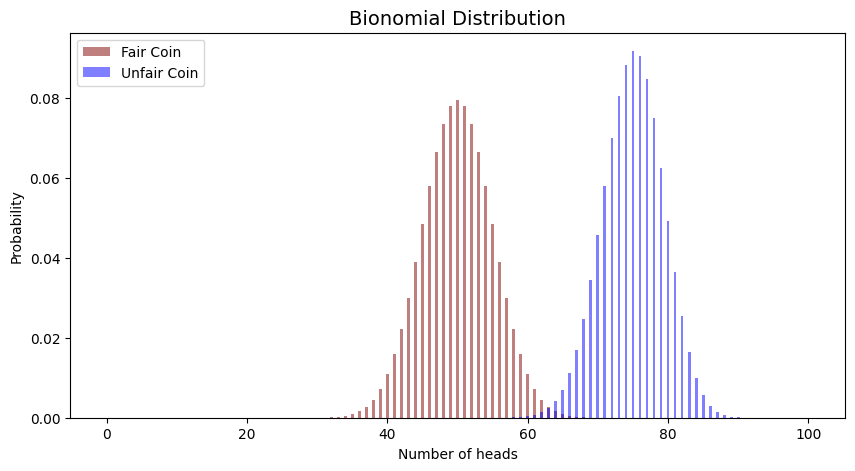

In [7]:
d1,d2=bionomial()
plot_graph(d1,d2)

now lets exhautively search to find a point above which p-value of graph 1 is around 10% and power i.e. (1-beta) of graph 2 greater than 80% or beta less than or equals to 20%

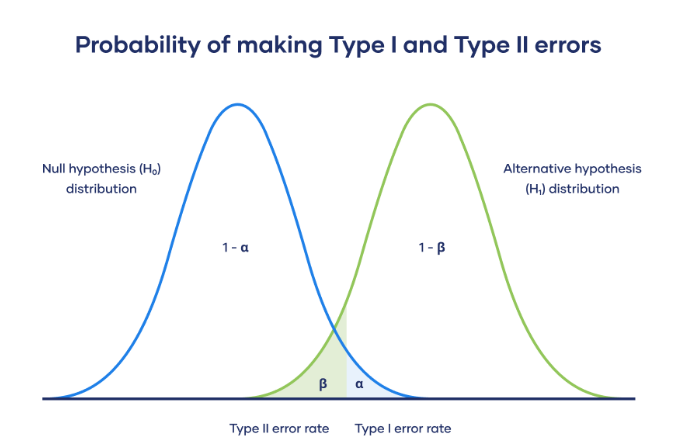

Null hypothesis : Fair coin \
Alternate hypothesis : Not fair/Unfair coin \
alpha : Probability of wrongly accusing fair coin user \
beta : Probability of not accusing unfair coin user


In [8]:
throws=100
throws_dic=throws
type_1=0
while type_1<=0.1:
    type_1+=d1[throws_dic]
    throws_dic-=1
throws_dic+=1
type_1-=d1[throws_dic]
throws_dic+=1
mark=throws_dic
type_2=0
while throws_dic<=100:
    type_2+=d2[throws_dic]
    throws_dic+=1
print(f'Type-1 Error rate : {type_1*100:0.3f}%')
print(f'Type-2 Error rate : {(1-type_2)*100:0.3f}%')
print(f"no. of throws = {throws} and n_limit = {mark}")

Type-1 Error rate : 9.667%
Type-2 Error rate : 0.003%
no. of throws = 100 and n_limit = 57


Good news! It looks like we met both our criterias (criteria 1 and 2). But let's double-check to make sure by testing it .

Accuracy of model : 98.0%


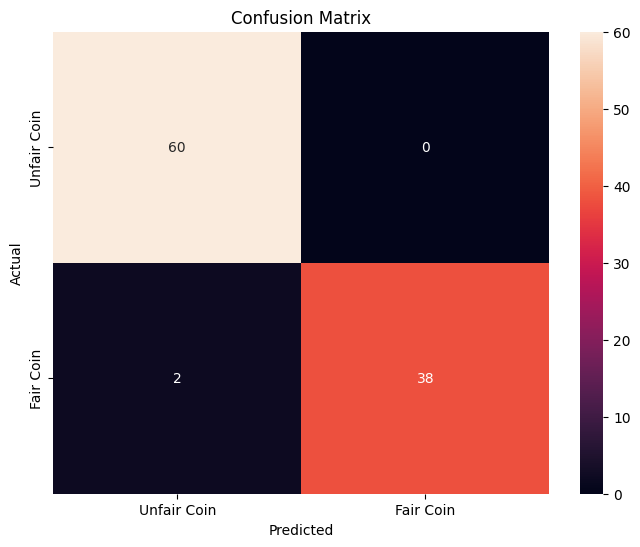

Type 1 error rate OR % of unbiased user falsely accused : 5.00%
Type 2 error rate OR % of biased user not accused : 0.00%


In [9]:
testing(100,100,57)

Great results but wouldn't a person be mad if you made him/her toss a 100 times.
Let's try minimizing no. of tosses as much as possible without strongly violating our criterias

In [10]:
final_type_1=0
final_type_2=0
n_limit=0
n_throws=0
for throws in reversed(range(101)):
    d1,d2=bionomial(throws)
    throws_dic=throws
    type_1=0
    while type_1<=0.1:
        type_1+=d1[throws_dic]
        throws_dic-=1
    throws_dic+=1
    type_1-=d1[throws_dic]
    throws_dic+=1
    mark=throws_dic
    type_2=0
    while throws_dic<=throws:
        type_2+=d2[throws_dic]
        throws_dic+=1
    if(type_2>=0.8):
        final_type_1=type_1
        final_type_2=type_2
        n_limit=mark
        n_throws=throws
    else:
        break;
print(f'Type-1 Error rate : {final_type_1*100:0.3f}%')
print(f'Type-2 Error rate : {(1-final_type_2)*100:0.3f}%')
print(f"no. of throws = {n_throws} and n_limit = {n_limit}")

Type-1 Error rate : 9.462%
Type-2 Error rate : 12.991%
no. of throws = 21 and n_limit = 14


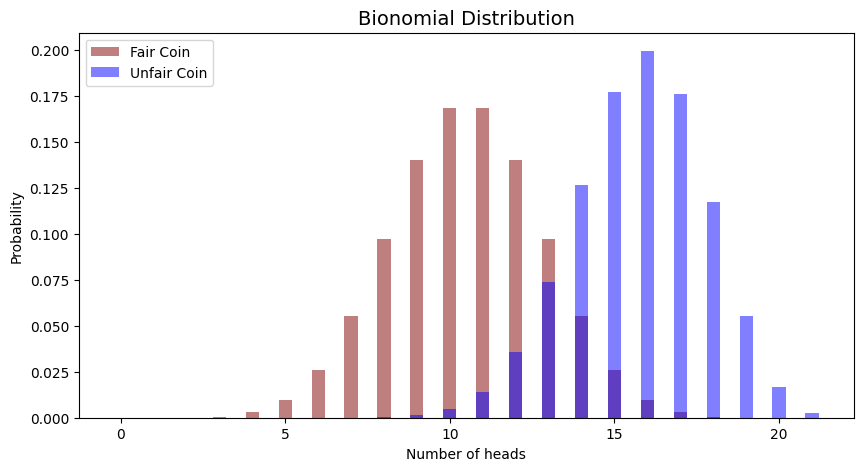

In [11]:
#let's check this out
d1,d2=bionomial(n_throws)
plot_graph(d1,d2)

Accuracy of model : 93.0%


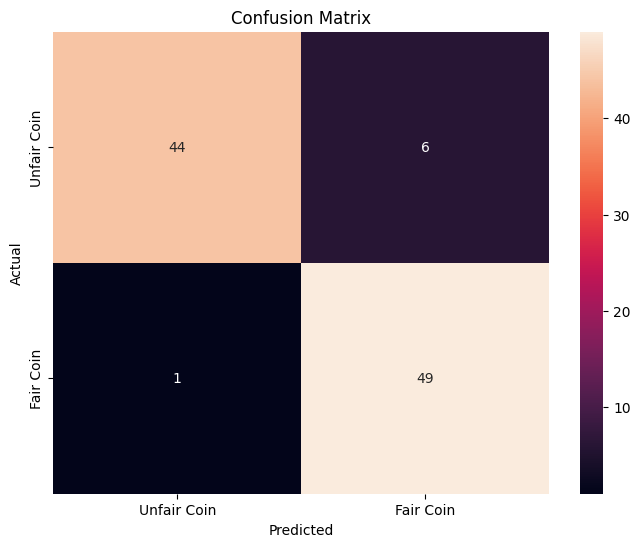

Type 1 error rate OR % of unbiased user falsely accused : 2.00%
Type 2 error rate OR % of biased user not accused : 12.00%


In [12]:
testing(100,21,14)

Finally both our criterias are met with minimum number of trials per person

Thanks for reading till the end :)